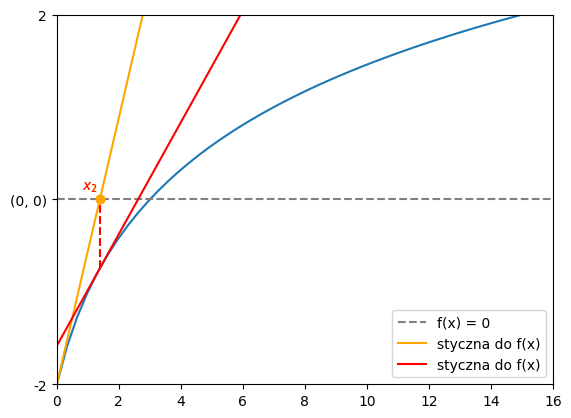

In [2]:
import matplotlib.pyplot as plt
import math
import numpy

x_array = numpy.linspace(0, 16)

x_1 = 2 * math.log(2)
y_1 = math.log2(x_1 + 1) - 2

#   func
plt.plot(x_array, [math.log2(x + 1) - 2 for x in x_array])
plt.plot(x_array, [0 for x in x_array], color = 'grey', ls = '--', label = 'f(x) = 0')

#   styczna 1   --------------------------
plt.plot(x_array, [(x / math.log(2)) - 2 for x in x_array], color = 'orange', label = 'styczna do f(x)')
#plt.axvline(2 * math.log(2), color = 'orange', ls = '--')
plt.plot([x_1, x_1], [y_1, 0], color = 'orange', linestyle = '--')

#   punkt
plt.text(0.8, 0.1, '$x_1$', color = 'orange')
plt.plot(2 * math.log(2), 0, 'o',color = 'orange')

#   styczna 2   --------------------------
x_2 = x_1
plt.plot(x_array, [((x - x_2) / ((math.log(2)) * (x_2 + 1)))  + math.log2(x_2 + 1) - 2 for x in x_array], color = 'red', label = 'styczna do f(x)')
plt.plot([x_1, x_1], [y_1, 0], color = 'red', linestyle = '--')

#   punkt
plt.text(0.8, 0.1, '$x_2$', color = 'red')
plt.plot(2 * math.log(2), 0, 'o',color = 'orange')


plt.legend(loc = 'lower right')
plt.margins(False)
plt.ylim(-2, 2)
plt.xlim(0, 16)

plt.yticks([-2, 0, 2], [-2, (0, 0), 2])

plt.show()

#stworzyc analogiczny (ogolny, funkcje) dla f(X) = x^4 - 13 dla x [-5, 1], 3 kropki od x_0 = -5

OK
OK
OK


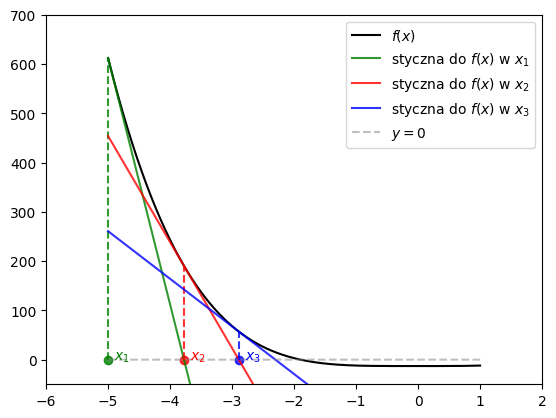

In [3]:
#   f(x) = x^4 - 13 dla x [-5, 1]

x_array = numpy.linspace(-5, 1, 1500)

def f(x):
    return x**4 - 13

def wartosc_pochodnej_f(x):
    return 4*x**3

def wartosc_stycznej(x_arr, x0):
    return wartosc_pochodnej_f(x0)*(x_arr - x0) + f(x0)

#   Funkcja podstawowa
plt.plot(x_array, f(x_array), color = 'black', label = r'$f(x)$')

#   Styczne
punkt_x = -5
indexy = [(1, 'green'), (2, 'red'), (3, 'blue')]

#   Rysujemy styczna + punkt + przerywana do x=0
for i, col in indexy:
    #   Punkt na wykresie funkcji podstawowej
    #plt.scatter(punkt_x, f(punkt_x), color = col, alpha = 0.8)
    #   wykres stycznej
    plt.plot(x_array, [wartosc_stycznej(i, punkt_x) for i in x_array], color = col, alpha = 0.8, label = f'styczna do $f(x)$ w $x_{i}$')

    #   Linia przerywana do osi
    plt.plot([punkt_x, punkt_x], [0, f(punkt_x)], alpha = 0.8, linestyle = '--', color = col)
    #   Punkt na osi
    plt.scatter(punkt_x, 0, color = col, alpha = 0.8)
    plt.text(punkt_x + 0.1, 0.1, f'$x_{i}$', color = col, alpha = 1)

    #   Znajdujemy kolejny punkt
    min = numpy.min([abs(wartosc_stycznej(i, punkt_x)) for i in x_array])
    for x in x_array:
        if abs(wartosc_stycznej(x, punkt_x)) == min:
            print('OK')
            punkt_x = x
            break

#   Linia przerywana y = 0
plt.plot(x_array, [0 for i in x_array], color = 'grey', alpha = 0.5, linestyle = '--', label = r'$y = 0$')
plt.legend()
plt.xlim(-6, 2)
plt.ylim(-50, 700)
plt.show()

In [78]:
#   Metoda Newtona-Raphsona

def newton_raphson(f, a, b, precyzja = 10**(-6)):
    if numpy.sign(f(a)) == numpy.sign(f(b)):
        print('Znaki na krancach sa takie same')
        return 0
    
    x_array = numpy.linspace(a, b, 1000)
    x_0 = a
    x_1 = b
    
    while(numpy.abs(x_0 - x_1) > precyzja):
        x_1 = x_0
        def wart_pochodnej(x):
            h = 0.001
            return (f(x + h) - f(x)) / h
        
        def styczna_y(x, x_0):
            return wart_pochodnej(x_0)*(x - x_0) + f(x_0)
        
        minimum = numpy.min(numpy.abs([styczna_y(x, x_0) for x in x_array]))
        print(minimum)

        x_0 = [i for i in x_array if numpy.abs(styczna_y(i, x_0)) == minimum][0]
        
        print(x_0)
    return x_0

def func(x):
    return (x-5)**3

newton_raphson(func, 4.9, 10)

6.138708708743057e-05
4.935735735735736
1.631857853570364e-05
4.9561561561561565
2.0417028207245274e-06
4.971471471471472
8.472158168577427e-07
4.981681681681682
1.283135764066161e-06
4.986786786786787
1.6974448950576566e-07
4.991891891891893
3.5473888790191285e-07
4.996996996996997
2.7081162270400735e-08
4.996996996996997


4.996996996996997